# GLM Model

## Overview

## Load data

In [21]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pprint
%load_ext autoreload
from scipy import stats
from pylab import rcParams

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
status_2015 = pd.read_csv('~/Code/bikesupply/data/test_data/status_may15.csv', parse_dates = ['time'])
status_2016 = pd.read_csv('~/Code/bikesupply/data/test_data/status_may16.csv', parse_dates = ['time'])

In [6]:
status_2015 = status_2015.set_index('time')
status_2015['hour'] = [ts.hour for ts in status_2015.index]
status_2015['weekday'] = [ts.weekday() for ts in status_2015.index]
means_2015 = status_2015.groupby(['weekday','station_id','hour']).mean()

In [7]:
status_2016['hour'] = status_2016.time.dt.hour
status_2016['weekday'] = status_2016.time.dt.weekday
status_2016['day'] = status_2016.time.dt.day
means_2016 = status_2016.groupby(['day', 'weekday', 'station_id','hour']).mean()

In [8]:
means_2015 = means_2015.reset_index()
means_2016 = means_2016.reset_index()

In [9]:
merged_df = pd.merge(means_2015, means_2016, on = ['weekday', 'station_id', 'hour'])

In [10]:
merged_df.rename(columns={'bikes_available_x': 'bikes_predicted', 'docks_available_x': 'docks_predicted', 'bikes_available_y': 'bikes_actual', 'docks_available_y': 'docks_actual'}, inplace=True)

In [11]:
merged_df["day_in_hours"] = merged_df['day'] * 24

In [12]:
merged_df["day-hour"] = merged_df["day_in_hours"] + merged_df["hour"]

## Linear Regression 

In [14]:
station_seventy = merged_df.query('station_id == 70')

In [16]:
station_seventy_day_two = station_seventy.query("day == 2")

In [17]:
def regression_prediction(data, slope, intercept):
    values = []
    for i in range(0, len(data)):
        values.append(slope * i + intercept)
    return values

In [18]:
X = station_seventy_day_two['day-hour']
A = station_seventy_day_two['bikes_predicted']
slope, intercept, r_value, p_value, std_err = stats.linregress(range(0,24), A)

In [19]:
station_seventy_day_two_predictions = regression_prediction(station_seventy_day_two, slope, intercept)

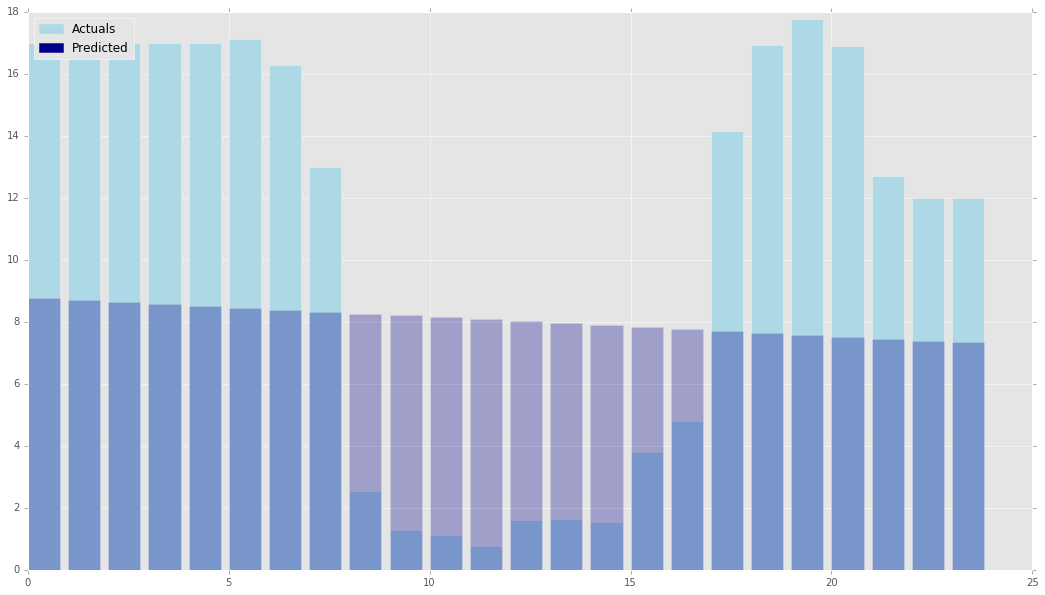

In [23]:
rcParams['figure.figsize'] =  18, 10

X = station_seventy_day_two['hour']
A = station_seventy_day_two_predictions
B = station_seventy_day_two['bikes_actual']

plt.bar(X, B, color = 'lightblue')
plt.bar(X, A, color = 'darkblue', alpha = 0.3)

import matplotlib.patches as mpatches

actual = mpatches.Patch(color='lightblue', label='Actuals')
predicted = mpatches.Patch(color='darkblue', label='Predicted')
plt.legend(handles=[actual, predicted], loc=2)

### Linear Regression - Validation

## Polynomial interpolation

Automatically created module for IPython interactive environment


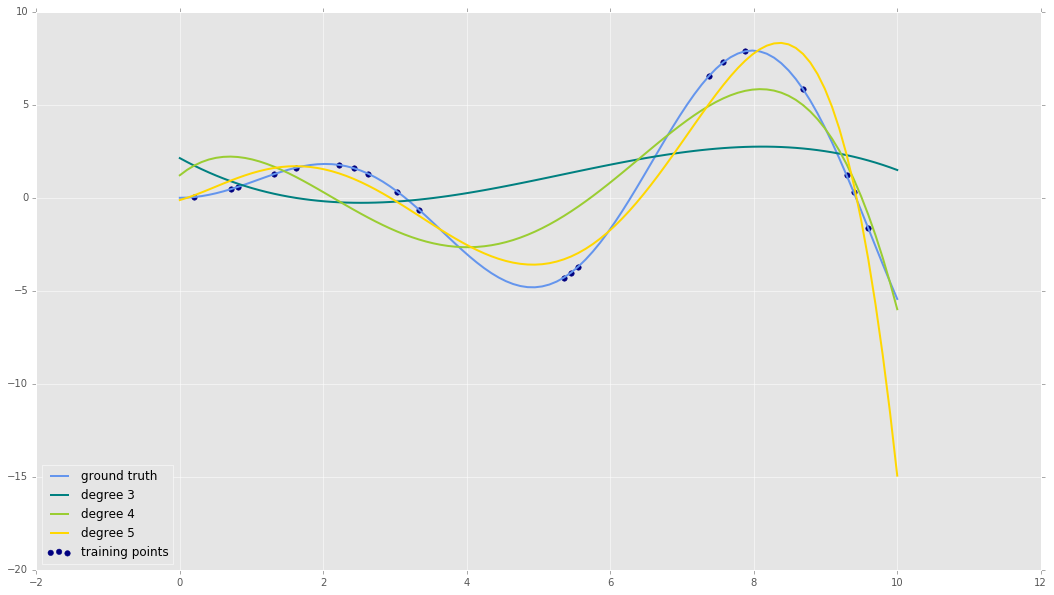

In [25]:
# Example to explore: http://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html

print(__doc__)

# Author: Mathieu Blondel
#         Jake Vanderplas
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()

### Polynomial interpolation - Validation